In [48]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.preprocessing import preprocesar_datos, guardar_datos_preprocesados

# 1. Carga de datos
def cargar_datos():
    print("Cargando datos...")
    df = pd.read_csv('order_profitability.csv') # raw data
    return df

df = cargar_datos()

Cargando datos...


In [49]:
# 2. Información básica del dataset
print("=== Información básica del dataset ===")
df.info()

=== Información básica del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231412 entries, 0 to 231411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Lead Time Days           231412 non-null  int64  
 1   Is Chiller Stock         231412 non-null  int64  
 2   Typical Weight Per Unit  231412 non-null  float64
 3   Product_Base_Price       231412 non-null  float64
 4   Buying Group             145943 non-null  object 
 5   Customer_Category        145943 non-null  object 
 6   Sales Territory          231412 non-null  object 
 7   Continent                231412 non-null  object 
 8   Country                  231412 non-null  object 
 9   Month                    231412 non-null  int64  
 10  Fiscal Year              231412 non-null  int64  
 11  Is_Holiday_Season        231412 non-null  int64  
 12  Quantity                 231412 non-null  int64  
 13  Package             

In [50]:
# 3. Visualización de las primeras filas
print("=== Primeras 5 filas ===")
df.head()

=== Primeras 5 filas ===


,Lead Time Days,Is Chiller Stock,Typical Weight Per Unit,Product_Base_Price,Buying Group,Customer_Category,Sales Territory,Continent,Country,Month,Fiscal Year,Is_Holiday_Season,Quantity,Package,Tax Rate,Profit_Margin,Profitability_Class
0,7,0,0.35,18.0,NaN,NaN,New England,North America,United States,12,2015,1,24,Each,15.0,17.0,Baja_Rentabilidad
1,14,0,0.05,32.0,Wingtip Toys,Novelty Shop,Southwest,North America,United States,9,2013,0,2,Each,15.0,-5.0,Perdida
2,12,0,0.35,32.0,Wingtip Toys,Novelty Shop,Southeast,North America,United States,6,2015,0,1,Each,15.0,6.0,Perdida
3,14,0,0.70,4.1,Tailspin Toys,Novelty Shop,Southeast,North America,United States,11,2015,1,168,Each,15.0,28.0,Rentabilidad_Media
4,14,0,15.00,230.0,Wingtip Toys,Novelty Shop,Plains,North America,United States,9,2015,0,1,Each,15.0,13.0,Baja_Rentabilidad


In [51]:
# 4. Análisis de valores nulos
print("=== Análisis de valores nulos ===")
nulos = df.isnull().sum()
nulos[nulos > 0]

=== Análisis de valores nulos ===


Buying Group         85469
Customer_Category    85469
dtype: int64

In [52]:
# 5. Estadísticas descriptivas
print("=== Estadísticas descriptivas ===")
df.describe()

=== Estadísticas descriptivas ===


,Lead Time Days,Is Chiller Stock,Typical Weight Per Unit,Product_Base_Price,Month,Fiscal Year,Is_Holiday_Season,Quantity,Tax Rate,Profit_Margin
count,231412.000000,231412.000000,231412.000000,231412.000000,231412.000000,231412.000000,231412.000000,231412.000000,231412.000000,231412.000000
mean,12.253059,0.004477,1.882357,45.331377,6.092420,2014.449532,0.142063,40.235182,14.977616,18.484504
std,2.734552,0.066760,3.868994,138.986586,3.425604,1.027083,0.349115,55.138491,0.333798,15.508465
min,2.000000,0.000000,0.050000,0.660000,1.000000,2013.000000,0.000000,1.000000,10.000000,-5.000000
25%,12.000000,0.000000,0.150000,13.000000,3.000000,2014.000000,0.000000,5.000000,15.000000,7.000000
50%,12.000000,0.000000,0.350000,18.000000,6.000000,2014.000000,0.000000,10.000000,15.000000,15.000000
75%,14.000000,0.000000,0.700000,32.000000,9.000000,2015.000000,0.000000,60.000000,15.000000,32.000000
max,20.000000,1.000000,21.000000,1899.000000,12.000000,2016.000000,1.000000,360.000000,15.000000,49.000000


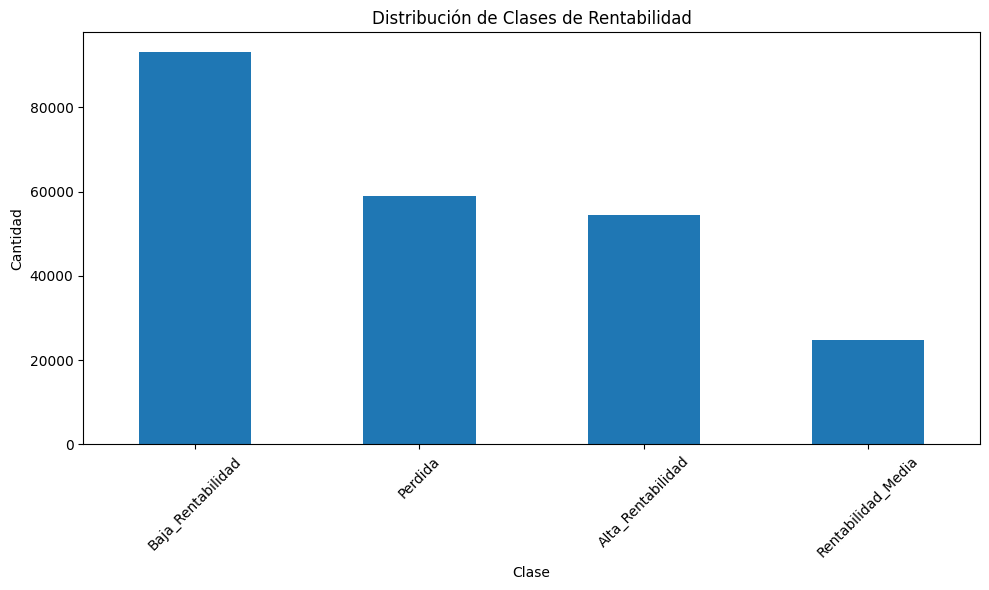

In [53]:
# 6. Visualización de la distribución de clases
plt.figure(figsize=(10, 6))
df['Profitability_Class'].value_counts().plot(kind='bar')
plt.title('Distribución de Clases de Rentabilidad')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

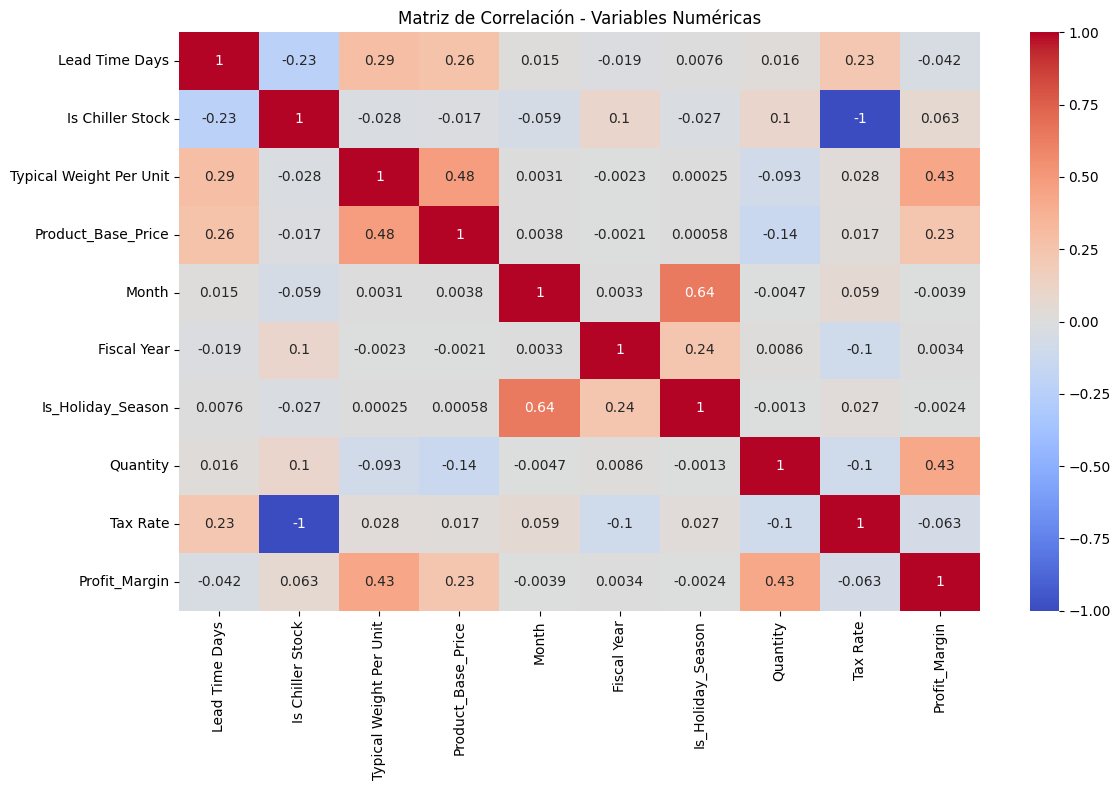

In [54]:
# 7. Matriz de correlación
numerical_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

In [55]:
# 8. Preprocesamiento de datos
print("=== Realizando preprocesamiento ===")
resultados = preprocesar_datos(df)

=== Realizando preprocesamiento ===


In [61]:
# 9. Verificación del preprocesamiento - Distribución de clases
print("=== Distribución de clases en el conjunto de entrenamiento ===")
clases_unicas, conteos = np.unique(resultados['y_train'], return_counts=True)
for clase, conteo in zip(clases_unicas, conteos):
    print(f"Clase {clase}: {conteo} muestras")

=== Distribución de clases en el conjunto de entrenamiento ===
Clase 0: 73729 muestras
Clase 1: 72479 muestras
Clase 2: 72810 muestras
Clase 3: 73498 muestras
=== Datos totales de clases
292516


In [57]:
# 10. Verificación del preprocesamiento - Formas de los conjuntos
print("=== Formas de los conjuntos de datos ===")
print(f"X_train: {resultados['X_train'].shape}")
print(f"X_test: {resultados['X_test'].shape}")
print(f"y_train: {resultados['y_train'].shape}")
print(f"y_test: {resultados['y_test'].shape}")

=== Formas de los conjuntos de datos ===
X_train: (292516, 15)
X_test: (46283, 15)
y_train: (292516,)
y_test: (46283,)


In [58]:
# 11. Verificación del preprocesamiento - Rango de valores
print("=== Rango de valores después del escalamiento (X_train) ===")
for columna in resultados['X_train'].columns:
    min_val = resultados['X_train'][columna].min()
    max_val = resultados['X_train'][columna].max()
    print(f"{columna}: [{min_val:.2f}, {max_val:.2f}]")

=== Rango de valores después del escalamiento (X_train) ===
Lead Time Days: [-5.00, 4.00]
Is Chiller Stock: [0.00, 1.00]
Typical Weight Per Unit: [-0.55, 2.14]
Product_Base_Price: [-0.91, 2.24]
Buying Group: [0.00, 2.00]
Customer_Category: [0.00, 1.00]
Sales Territory: [0.00, 8.00]
Continent: [0.00, 0.00]
Country: [0.00, 0.00]
Month: [-0.83, 1.00]
Fiscal Year: [-1.00, 2.00]
Is_Holiday_Season: [0.00, 1.00]
Quantity: [-0.16, 2.41]
Package: [0.00, 3.00]
Tax Rate: [-5.00, 0.00]


In [59]:
# 12. Guardar datos preprocesados
print("=== Guardando datos preprocesados ===")
guardar_datos_preprocesados(resultados)
print("¡Proceso completado con éxito!")

=== Guardando datos preprocesados ===
¡Proceso completado con éxito!
